## 🌟 Exercise 1: Duplicate Detection and Removal
Instructions

Objective: Identify and remove duplicate entries in the Titanic dataset.

    Load the Titanic dataset.
    Identify if there are any duplicate rows based on all columns.
    Remove any duplicate rows found in the dataset.
    Verify the removal of duplicates by checking the number of rows before and after the duplicate removal.

Hint: Use the duplicated() and drop_duplicates() functions in Pandas.

In [1]:
import pandas as pd

df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
tot_duplicates = df.duplicated().sum()
print(tot_duplicates)

0


there are no duplicates, but in case there were we would have to apply
```python
df.drop_duplicates()
```

then to verify we would do again:
```python
df.duplicated().sum()

## 🌟 Exercise 2: Handling Missing Values
Instructions

    Identify columns in the Titanic dataset with missing values.
    Explore different strategies for handling missing data, such as removal, imputation, and filling with a constant value.
    Apply each strategy to different columns based on the nature of the data.

Hint: Review methods like dropna(), fillna(), and SimpleImputer from scikit-learn.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


the columns with missing values are `age`, `cabin` and `embarked`

To simply remove the missing values we apply `python dropna()`:


In [4]:
import sklearn

df_dropped = df.dropna()
df_dropped.info()

<class 'pandas.core.frame.DataFrame'>
Index: 183 entries, 1 to 889
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  183 non-null    int64  
 1   Survived     183 non-null    int64  
 2   Pclass       183 non-null    int64  
 3   Name         183 non-null    object 
 4   Sex          183 non-null    object 
 5   Age          183 non-null    float64
 6   SibSp        183 non-null    int64  
 7   Parch        183 non-null    int64  
 8   Ticket       183 non-null    object 
 9   Fare         183 non-null    float64
 10  Cabin        183 non-null    object 
 11  Embarked     183 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 18.6+ KB


That eliminated more than 3/4 population... not good

The next attempt is fillna(), where we fill missing values with a constant like median, avg, mode. First we should check the distributions:

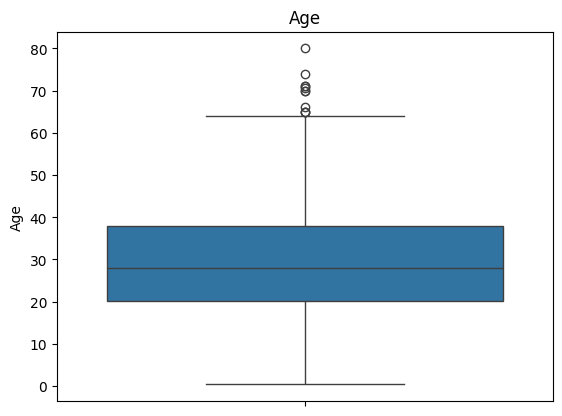

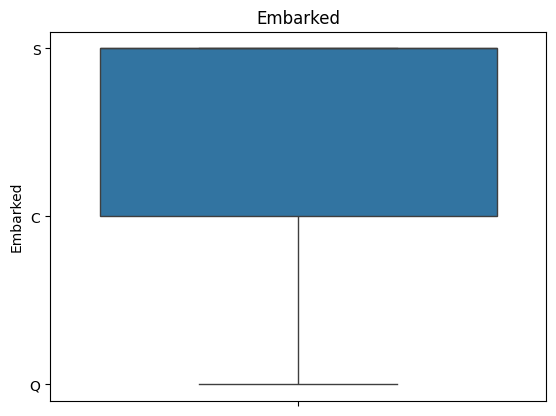

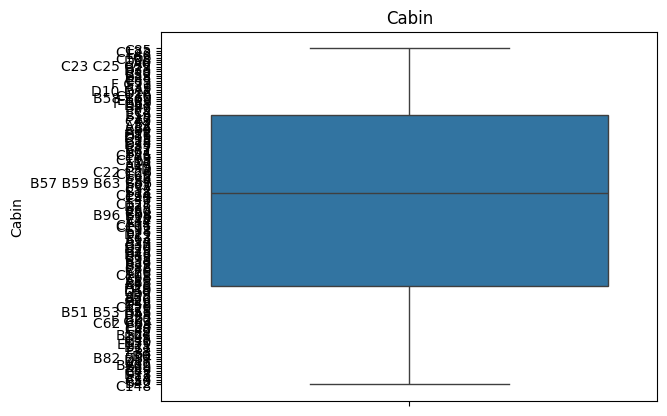

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# age
plt.figure()
sns.boxplot(y=df['Age'])
plt.title('Age')
plt.show()

# embarked
plt.figure()
sns.boxplot(y='Embarked', data=df)
plt.title('Embarked')
plt.show()

# cabin
plt.figure()
sns.boxplot(y='Cabin', data=df)
plt.title('Cabin')
plt.show()

Age is right-skewed so we employ the median


Embarked is also right-skewed, but categorical (object). So it's better to employ mode


Finally Cabin is also categorical, but with a lot of categories, so we fill with 'unknown'

In [6]:
df['Cabin'].value_counts()

Cabin
G6             4
C23 C25 C27    4
B96 B98        4
F2             3
D              3
              ..
E17            1
A24            1
C50            1
B42            1
C148           1
Name: count, Length: 147, dtype: int64

In [7]:
df_fill = df.copy()
df_fill['Age'] = df_fill['Age'].fillna(df_fill['Age'].median())
df_fill['Embarked'] = df_fill['Embarked'].fillna(df_fill['Embarked'].mode()[0])
df_fill['Cabin'] = df_fill['Cabin'].fillna('Unknown')

# # for age, we fill with mean
# df_fill['Age'] = df_fill['Age'].fillna(df_fill['Age'].mean())

# # for embarked and cabin we fill with unknown
# df_fill['Embarked'] = df_fill['Embarked'].fillna(df_fill['Embarked'].mode()[0])
# df_fill['Cabin'] = df_fill['Cabin'].fillna('Unknown')

# check if there is still nan
print(df_fill.isnull().sum())
print("------------------------------------\n")

print('------- filled -------')
print(df_fill.info())

print('------- original -------')
print(df.info())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64
------------------------------------

------- filled -------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5),

In [8]:
print('------- filled -------')
print(df_fill[['Age', 'Embarked', 'Cabin']].describe(include='all'))

print('------- original -------')
print(df[['Age', 'Embarked', 'Cabin']].describe(include='all'))

------- filled -------
               Age Embarked    Cabin
count   891.000000      891      891
unique         NaN        3      148
top            NaN        S  Unknown
freq           NaN      646      687
mean     29.361582      NaN      NaN
std      13.019697      NaN      NaN
min       0.420000      NaN      NaN
25%      22.000000      NaN      NaN
50%      28.000000      NaN      NaN
75%      35.000000      NaN      NaN
max      80.000000      NaN      NaN
------- original -------
               Age Embarked Cabin
count   714.000000      889   204
unique         NaN        3   147
top            NaN        S    G6
freq           NaN      644     4
mean     29.699118      NaN   NaN
std      14.526497      NaN   NaN
min       0.420000      NaN   NaN
25%      20.125000      NaN   NaN
50%      28.000000      NaN   NaN
75%      38.000000      NaN   NaN
max      80.000000      NaN   NaN


For `Age` the mean remained without change, the std was reduced about a 5%, the median was kept in 28.0. The median is a good filling choice for this column
For `Embarked` and `Cabin` we don't have stats per se, but the theory applied.

Now we proceed to apply SimpleImputer:

In [9]:
from sklearn.impute import SimpleImputer

# i never overwrite original df
df_imputed = df_fill.copy()


# age
imputer_age = SimpleImputer(strategy='median')
# Usar .ravel() para convertir a 1D!!!!!
df_imputed['Age'] = imputer_age.fit_transform(df_imputed[['Age']]).ravel() 


# embarked
imputer_embarked = SimpleImputer(strategy='most_frequent')
# Usar .ravel() para convertir a 1D!!!!!
df_imputed['Embarked'] = imputer_embarked.fit_transform(df_imputed[['Embarked']]).ravel()


# cabin, but its the same constant 'unknown' pfffffff
imputer_cabin = SimpleImputer(strategy='constant', fill_value='Unknown')
# Usar .ravel() para convertir a 1D!!!!!
df_imputed['Cabin'] = imputer_cabin.fit_transform(df_imputed[['Cabin']]).ravel()


# Verificar los resultados
print('------- Imputed DataFrame -------')
print(df_imputed[['Age', 'Embarked', 'Cabin']].describe(include='all'))

print('\n------- Original DataFrame -------')
print(df[['Age', 'Embarked', 'Cabin']].describe(include='all'))

------- Imputed DataFrame -------
               Age Embarked    Cabin
count   891.000000      891      891
unique         NaN        3      148
top            NaN        S  Unknown
freq           NaN      646      687
mean     29.361582      NaN      NaN
std      13.019697      NaN      NaN
min       0.420000      NaN      NaN
25%      22.000000      NaN      NaN
50%      28.000000      NaN      NaN
75%      35.000000      NaN      NaN
max      80.000000      NaN      NaN

------- Original DataFrame -------
               Age Embarked Cabin
count   714.000000      889   204
unique         NaN        3   147
top            NaN        S    G6
freq           NaN      644     4
mean     29.699118      NaN   NaN
std      14.526497      NaN   NaN
min       0.420000      NaN   NaN
25%      20.125000      NaN   NaN
50%      28.000000      NaN   NaN
75%      38.000000      NaN   NaN
max      80.000000      NaN   NaN


The results are very much the same as before

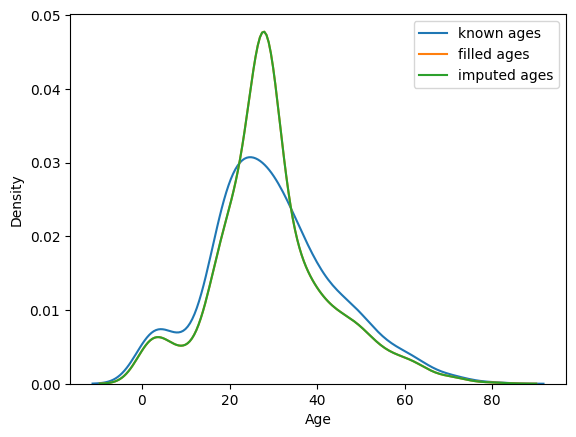

In [10]:
sns.kdeplot(df['Age'][df['Age'].notnull()], label="known ages")
sns.kdeplot(df_fill['Age'], label="filled ages")
sns.kdeplot(df_imputed['Age'], label="imputed ages")
plt.legend()
plt.show()

# filled and imputed are superposed

## 🌟 Exercise 3: Feature Engineering
Instructions

    Create new features, such as Family Size from SibSp and Parch, and Title extracted from the Name column.
    Convert categorical variables into numerical form using techniques like one-hot encoding or label encoding.
    Normalize or standardize numerical features if required.

Hint: Utilize Pandas for data manipulation and scikit-learn’s preprocessing module for encoding.

In [11]:
# feature engineering: family size
# a passenger has SibSp siblings and Parch parents, so the family size is then
# (number sibblings) + (parents) + passenger
df_fill['Family_Size'] = df_fill['SibSp'] + df_fill['Parch'] + 1

# the Name column has the format (last_name, first_name)
df_fill[['Last_Name', 'First_Name']] = df_fill['Name'].str.split(',', n=1, expand=True) # n is the max num of divisions 
df_fill['Title'] = df_fill['First_Name'].str.split(' ').str[1] # here we dont need expand bc is only one column
df_fill['First_Name'] = df_fill['First_Name'].str.split(' ', n=2).str[2] # so the title doesnt remain in the name

df_fill.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Last_Name,First_Name,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S,2,Braund,Owen Harris,Mr.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,Cumings,John Bradley (Florence Briggs Thayer),Mrs.
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S,1,Heikkinen,Laina,Miss.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,Futrelle,Jacques Heath (Lily May Peel),Mrs.
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S,1,Allen,William Henry,Mr.


Convert categorical variables into numerical form using techniques like one-hot encoding or label encoding:

In [12]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [13]:
from sklearn.preprocessing import LabelEncoder

# no writing original
df_encoded = df_fill.copy()

# sex is ordinal --> label encoding
label_encoder = LabelEncoder()
df_encoded['Sex'] = label_encoder.fit_transform(df_encoded['Sex'])

# embarked & cabin categoric, many categories --> one hot
df_encoded = pd.get_dummies(df_encoded, columns=['Embarked', 'Cabin'], drop_first=True)

print(df_encoded.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    1  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.0      1      0   
2                             Heikkinen, Miss. Laina    0  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.0      1      0   
4                           Allen, Mr. William Henry    1  35.0      0      0   

             Ticket     Fare  ...  Cabin_F E69 Cabin_F G63 Cabin_F G73  \
0         A/5 21171   7.2500  ...        False       False       False   
1          PC 17599  71.2833  ...        False       False       False   
2  STON/O2. 3101282   7.9250  ...        False       False       False   


Normalize or standardize numerical features if required:

In [14]:
from sklearn.preprocessing import StandardScaler

# keep original just in case
df_scaled = df_fill.copy()

# numeric only
numeric_cols = ['Age', 'SibSp', 'Parch', 'Fare', 'Family_Size']

# apply scaler
scaler = StandardScaler()
df_scaled[numeric_cols] = scaler.fit_transform(df_scaled[numeric_cols])

print(df_scaled[numeric_cols].describe())

                Age         SibSp         Parch          Fare   Family_Size
count  8.910000e+02  8.910000e+02  8.910000e+02  8.910000e+02  8.910000e+02
mean   2.272780e-16  4.386066e-17  5.382900e-17  3.987333e-18 -2.392400e-17
std    1.000562e+00  1.000562e+00  1.000562e+00  1.000562e+00  1.000562e+00
min   -2.224156e+00 -4.745452e-01 -4.736736e-01 -6.484217e-01 -5.609748e-01
25%   -5.657365e-01 -4.745452e-01 -4.736736e-01 -4.891482e-01 -5.609748e-01
50%   -1.046374e-01 -4.745452e-01 -4.736736e-01 -3.573909e-01 -5.609748e-01
75%    4.333115e-01  4.327934e-01 -4.736736e-01 -2.424635e-02  5.915988e-02
max    3.891554e+00  6.784163e+00  6.974147e+00  9.667167e+00  5.640372e+00


## 🌟 Exercise 4: Outlier Detection and Handling
Instructions

    Use statistical methods to detect outliers in columns like Fare and Age.
    Decide on a strategy to handle the identified outliers, such as capping, transformation, or removal.
    Implement the chosen strategy and assess its impact on the dataset.

Hint: Explore methods like IQR (Interquartile Range) and Z-score for outlier detection.

In [24]:
df_outliers = df_fill.copy()

def iqr_outlier_detector(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return data[(data[column] < lower) | (data[column] > upper)]

def zscore_outlier_detector(data, column, threshold=3):
    z_scores = np.abs(stats.zscore(data[column]))
    return data[z_scores > threshold]

# outliers_age = outlier_detector(df_outliers, 'Age')
# print('age outliers are:')
# print(outliers_age[['Age']].describe())

# outliers_fare = outlier_detector(df_outliers, 'Fare')
# print("\nfare outliers are:")
# print(outliers_fare[['Fare']].describe())

outliers_age_iqr = iqr_outlier_detector(df_outliers, 'Age')
outliers_fare_iqr = iqr_outlier_detector(df_outliers, 'Fare')
outliers_age_zscore = iqr_outlier_detector(df_outliers, 'Age')
outliers_fare_zscore = iqr_outlier_detector(df_outliers, 'Fare')

print('age outliers IQR:')
print(outliers_age_iqr[['Age']].describe())

print('\nage outliers z-score:')
print(outliers_age_zscore[['Age']].describe())

print('\nfare outliers IQR:')
print(outliers_fare_iqr[['Age']].describe())

print('\nfare outliers z-score:')
print(outliers_fare_zscore[['Age']].describe())

print('\namount of age outliers:')
print(f'IQR method: {len(outliers_age_iqr)}')
print(f'Z-score method: {len(outliers_age_zscore)}')

print('\namount of fare outliers:')
print(f'IQR method: {len(outliers_fare_iqr)}')
print(f'Z-score method: {len(outliers_fare_zscore)}')

age outliers IQR:
             Age
count  66.000000
mean   39.941970
std    29.752738
min     0.420000
25%     2.000000
50%    57.500000
75%    62.000000
max    80.000000

age outliers z-score:
             Age
count  66.000000
mean   39.941970
std    29.752738
min     0.420000
25%     2.000000
50%    57.500000
75%    62.000000
max    80.000000

fare outliers IQR:
              Age
count  116.000000
mean    33.456207
std     13.885239
min      0.920000
25%     24.000000
50%     30.000000
75%     41.250000
max     70.000000

fare outliers z-score:
              Age
count  116.000000
mean    33.456207
std     13.885239
min      0.920000
25%     24.000000
50%     30.000000
75%     41.250000
max     70.000000

amount of age outliers:
IQR method: 66
Z-score method: 66

amount of fare outliers:
IQR method: 116
Z-score method: 116


To keep most amount of rows we can apply capping instead of removal:

0 <= age <= P<sub>95</sub>

P<sub>05</sub> <= fare <= P<sub>95</sub>

In [16]:
# age limits
age_lower = 0
age_upper = df_fill['Age'].quantile(0.95)

# capping
df_outliers['Age'] = df_outliers['Age'].clip(lower=age_lower, upper=age_upper)

# fare limits
fare_lower = 0
fare_upper = df_outliers['Fare'].quantile(0.95)

# fare capping
df_outliers['Fare'] = df_outliers['Fare'].clip(lower=fare_lower, upper=fare_upper)

# Verificar resultados después del capping
print('-------------- age capped --------------')
print(df_outliers['Age'].describe())

print("\n-------------- Fare capped --------------")
print(df_outliers['Fare'].describe())

-------------- age capped --------------
count    891.000000
mean      28.984478
std       12.093266
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       54.000000
Name: Age, dtype: float64

-------------- Fare capped --------------
count    891.000000
mean      27.720486
std       29.225083
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      112.079150
Name: Fare, dtype: float64


## 🌟 Exercise 5: Data Standardization and Normalization
Instructions

    Assess the scale and distribution of numerical columns in the dataset.
    Apply standardization to features with a wide range of values.
    Normalize data that requires a bounded range, like [0, 1].

Hint: Consider using StandardScaler and MinMaxScaler from scikit-learn’s preprocessing module.

In [30]:
# original state evaluation....
print('no scale:')
print(df_scaled.describe())

no scale:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.361582    0.523008   
std     257.353842    0.486592    0.836071   13.019697    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   22.000000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   35.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  Family_Size  
count  891.000000  891.000000   891.000000  
mean     0.381594   32.204208     1.904602  
std      0.806057   49.693429     1.613459  
min      0.000000    0.000000     1.000000  
25%      0.000000    7.910400     1.000000  
50%      0.000000   14.454200     1.000000  
75%      0.000000   31.000000     2.000000  

In [34]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

df_scaled = df_fill.copy()

# apply standarization to ['Age', 'Fare', 'SibSp', 'Parch', 'Family_Size'] so they have `median = 0` and `std = 1

# only numerical of interest
numeric_cols = ['Age', 'Fare', 'Family_Size']

# scalers instantation
sscaler = StandardScaler()
mmscaler = MinMaxScaler()

# scale
scaler = sscaler
df_scaled[numeric_cols] = scaler.fit_transform(df_scaled[numeric_cols])

print("after standard scaling:")
print(df_scaled[numeric_cols].describe())

after standard scaling:
                Age          Fare   Family_Size
count  8.910000e+02  8.910000e+02  8.910000e+02
mean   2.272780e-16  3.987333e-18 -2.392400e-17
std    1.000562e+00  1.000562e+00  1.000562e+00
min   -2.224156e+00 -6.484217e-01 -5.609748e-01
25%   -5.657365e-01 -4.891482e-01 -5.609748e-01
50%   -1.046374e-01 -3.573909e-01 -5.609748e-01
75%    4.333115e-01 -2.424635e-02  5.915988e-02
max    3.891554e+00  9.667167e+00  5.640372e+00


In [36]:
df_scaled = df_fill.copy()

# scale normalized
scaler = mmscaler
df_scaled[numeric_cols] = scaler.fit_transform(df_scaled[numeric_cols])

print("after min-max scaling:")
print(df_scaled[numeric_cols].describe())

after min-max scaling:
              Age        Fare  Family_Size
count  891.000000  891.000000   891.000000
mean     0.363679    0.062858     0.090460
std      0.163605    0.096995     0.161346
min      0.000000    0.000000     0.000000
25%      0.271174    0.015440     0.000000
50%      0.346569    0.028213     0.000000
75%      0.434531    0.060508     0.100000
max      1.000000    1.000000     1.000000


## 🌟 Exercise 6: Feature Encoding
Instructions

    Identify categorical columns in the Titanic dataset, such as Sex and Embarked.
    Use one-hot encoding for nominal variables and label encoding for ordinal variables.
    Integrate the encoded features back into the main dataset.

Hint: Utilize pandas.get_dummies() for one-hot encoding and LabelEncoder from scikit-learn for label encoding.

In [41]:
df_scaled.pop('Name')
df_scaled.pop('SibSp')
df_scaled.pop('Parch')
df_scaled.head()

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Family_Size,Last_Name,First_Name,Title
0,1,0,3,male,0.271174,A/5 21171,0.014151,Unknown,S,0.1,Braund,Owen Harris,Mr.
1,2,1,1,female,0.472229,PC 17599,0.139136,C85,C,0.1,Cumings,John Bradley (Florence Briggs Thayer),Mrs.
2,3,1,3,female,0.321438,STON/O2. 3101282,0.015469,Unknown,S,0.0,Heikkinen,Laina,Miss.
3,4,1,1,female,0.434531,113803,0.103644,C123,S,0.1,Futrelle,Jacques Heath (Lily May Peel),Mrs.
4,5,0,3,male,0.434531,373450,0.015713,Unknown,S,0.0,Allen,William Henry,Mr.


embarked & cabin are nominal, sex is ordinal

In [44]:
df_encoded = df_scaled.copy()

# ordinal
label_encoder = LabelEncoder()
df_encoded['Sex'] = label_encoder.fit_transform(df_encoded['Sex'])

# nominal
df_encoded = pd.get_dummies(df_encoded, columns=['Embarked', 'Cabin'], drop_first=True)


print("encoded DF")
print(df_encoded.head())


print("\nencoded DF cols:")
print(df_encoded.columns)

encoded DF
   PassengerId  Survived  Pclass  Sex       Age            Ticket      Fare  \
0            1         0       3    1  0.271174         A/5 21171  0.014151   
1            2         1       1    0  0.472229          PC 17599  0.139136   
2            3         1       3    0  0.321438  STON/O2. 3101282  0.015469   
3            4         1       1    0  0.434531            113803  0.103644   
4            5         0       3    1  0.434531            373450  0.015713   

   Family_Size  Last_Name                             First_Name  ...  \
0          0.1     Braund                            Owen Harris  ...   
1          0.1    Cumings  John Bradley (Florence Briggs Thayer)  ...   
2          0.0  Heikkinen                                  Laina  ...   
3          0.1   Futrelle          Jacques Heath (Lily May Peel)  ...   
4          0.0      Allen                          William Henry  ...   

  Cabin_F E69  Cabin_F G63  Cabin_F G73  Cabin_F2  Cabin_F33  Cabin_F38  \


## 🌟 Exercise 7: Data Transformation for Age Feature
Instructions

    Create age groups (bins) from the Age column to categorize passengers into different age categories.
    Apply one-hot encoding to the age groups to convert them into binary features.

Hint: Use pd.cut() for binning the Age column and pd.get_dummies() for one-hot encoding.

In [47]:
df_final = df_fill.copy()

# Group numeric data into bins.
df_final['AgeGroup'] = pd.cut(df_final['Age'], bins=[0, 18, 50, 80], labels=['Child', 'Adult', 'Senior'])

# encoding
df_final = pd.get_dummies(df_final, columns=['AgeGroup'], drop_first=True)

print("age encoding:")
print(df_final.head())

# Opcional: Revisar las columnas después de la codificación
print("\nfinal columns:")
print(df_final.columns)

age encoding:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare    Cabin Embarked  Family_Size  Last_Name  \
0      0         A/5 21171   7.2500  Unknown        S            2     Braund   
1      0          PC 17599  71.2833      C85        C            2    Cumings   
2      0  STON/O2. 3101282   7.9250  Unknown        S          